In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import time
from time import sleep
from random import randint
from IPython.core.display import clear_output
from warnings import warn

In [2]:
names = []
years = []
ratings = []
metascores = []
votes = []

pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

headers = {"Accept-Language": "en-US, en;q=0.5"}

start_time = time()
requests = 0

for year_url in years_url:
    for page in pages:
        response = get("http://www.imdb.com/search/title?release_date="+year_url+"&sort=num_votes,desc&page="+page,
                               headers = headers)
        sleep(randint(8,15))
        
        requests += 1
        elasped_time = time()-start_time
        print("Requests:{}; Frequency:{} requests/sec".format(requests, requests/elasped_time))
        clear_output(wait = True)
        
        if response.status_code != 200:
            warn("Requests:{}; Status Code:{}".format(requests, reponse.status_code))
        
        if requests > 72:
            warn("No. of requests are greater than expected.")
            break
            
        page_html = BeautifulSoup(response.content,'html.parser')
        mv_containers = page_html.find_all('div',class_="lister-item mode-advanced")
        
        for movie in mv_containers:
            if movie.find('div',class_ = "ratings-metascore") is not None:
                
                name = movie.h3.a.text
                names.append(name)
                
                year = movie.h3.find('span',class_="lister-item-year").text
                years.append(year)
                
                rating = float(movie.strong.text)
                ratings.append(rating)
                
                metascore = movie.find('span',class_ = "metascore").text
                metascores.append(int(metascore))
                
                vote = movie.find('span',attrs={'name':'nv'})['data-value']
                votes.append(int(vote))



Requests:72; Frequency:0.07260705170699677 requests/sec


In [3]:
movie_ratings = pd.DataFrame({"Movie":names,"Year":years,"IMDb Rating":ratings,"Metascore":metascores,"Votes":votes})
print(movie_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie        3276 non-null   object 
 1   Year         3276 non-null   object 
 2   IMDb Rating  3276 non-null   float64
 3   Metascore    3276 non-null   int64  
 4   Votes        3276 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 128.1+ KB
None


In [4]:
movie_ratings.head(10)

,Movie,Year,IMDb Rating,Metascore,Votes
0,Gladiator,(2000),8.5,67,1288447
1,Memento,(2000),8.4,80,1082747
2,Snatch,(2000),8.3,55,756929
3,Requiem for a Dream,(2000),8.3,68,738237
4,X-Men,(2000),7.4,64,556887
5,Cast Away,(2000),7.8,73,502062
6,American Psycho,(2000),7.6,64,463552
7,Unbreakable,(2000),7.3,62,375771
8,Mission: Impossible II,(2000),6.1,59,304156
9,Meet the Parents,(2000),7.0,73,302855


In [5]:
movie_ratings['Year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [6]:
movie_ratings.loc[:,'Year']  = movie_ratings['Year'].str[-5:-1].astype(int)

In [7]:
movie_ratings.head()

,Movie,Year,IMDb Rating,Metascore,Votes
0,Gladiator,2000,8.5,67,1288447
1,Memento,2000,8.4,80,1082747
2,Snatch,2000,8.3,55,756929
3,Requiem for a Dream,2000,8.3,68,738237
4,X-Men,2000,7.4,64,556887


In [8]:
movie_ratings.describe().loc[['min','max'],['IMDb Rating','Metascore']]

,IMDb Rating,Metascore
min,4.1,24.0
max,9.0,100.0


In [9]:
movie_ratings['n_IMDb'] = movie_ratings['IMDb Rating']*10
movie_ratings.head(3)

,Movie,Year,IMDb Rating,Metascore,Votes,n_IMDb
0,Gladiator,2000,8.5,67,1288447,85.0
1,Memento,2000,8.4,80,1082747,84.0
2,Snatch,2000,8.3,55,756929,83.0


No handles with labels found to put in legend.


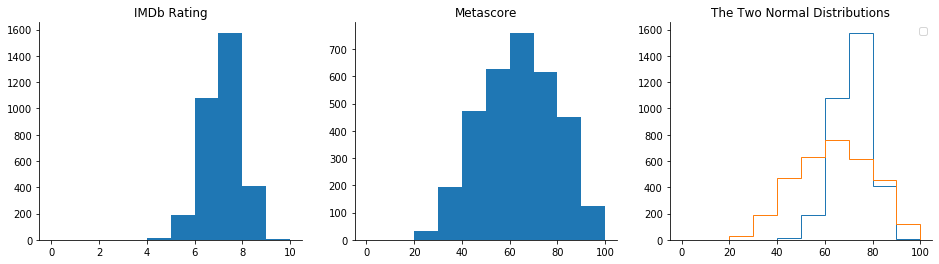

In [10]:
import matplotlib.pyplot as  plt
fig,axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4)) 
ax1,ax2,ax3 = fig.axes
ax1.hist(movie_ratings['IMDb Rating'],bins = 10,range = (0,10))
ax1.set_title('IMDb Rating')
ax2.hist(movie_ratings['Metascore'],bins = 10, range = (0,100))
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_IMDb'], bins = 10, range = (0,100),histtype='step')
ax3.hist(movie_ratings['Metascore'], bins = 10, range = (0,100),histtype='step')
ax3.legend()
ax3.set_title('The Two Normal Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

In [11]:
movie_ratings.to_csv('movie_ratings.csv')